In [1]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt

In [4]:
if not os.path.isdir('models'):
    os.mkdir('models')
    
print("Tensorflow version:", tf.__version__)    

Tensorflow version: 2.2.0


In [5]:
def get_three_classes(x, y):
    indicies_0, _ = np.where(y==0.)
    indicies_1, _ = np.where(y==1.)
    indicies_2, _ = np.where(y==2.)
    
    indicies = np.concatenate([indicies_0, indicies_1, indicies_2], axis = 0)
    
    x = x[indicies]
    y = y[indicies]
    
    count = x.shape[0]
    indicies = np.random.choice(range(count), count, replace = False)
    
    x = x[indicies]
    y = y[indicies]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, y_train = get_three_classes(x_train, y_train)
x_test, y_test = get_three_classes(x_test, y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

170500096/170498071 [==============================] - 1413s 8us/step
(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


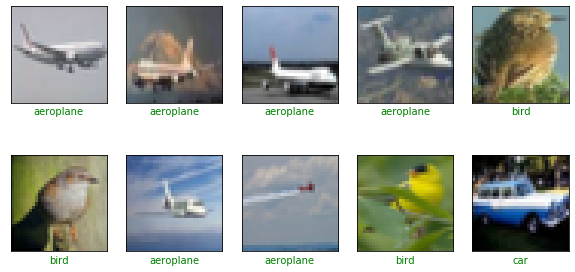

In [8]:
class_names = ['aeroplane', 'car', 'bird']

def show_random_examples(x, y, p):
    indicies = np.random.choice(range(x.shape[0]), 10, replace = False)
    
    x = x[indicies]
    y = y[indicies]
    p = p[indicies]
    
    plt.figure(figsize = (10, 5))
    for i in range(10):
        plt.subplot(2, 5, 1+i)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel(class_names[np.argmax(p[i])], color = col)
    plt.show()
    
show_random_examples(x_train, y_train, y_train)

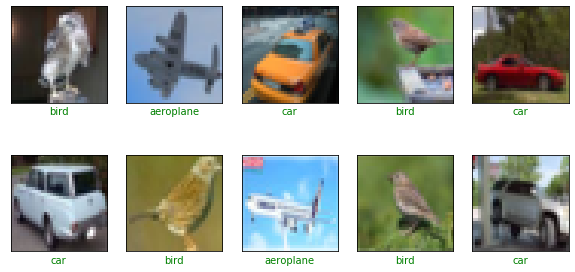

In [9]:
show_random_examples(x_test, y_test, y_test)

In [12]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

def create_model():
    def add_conv_block(model, num_filters):
        model.add(Conv2D(num_filters, 3, activation = 'relu', padding = 'same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters, 3, activation = 'relu'))
        model.add(MaxPooling2D(pool_size = 2))
        model.add(Dropout(0.5))
        return model
    model = tf.keras.models.Sequential()
    model.add(Input(shape = (32, 32, 3)))
    
    model = add_conv_block(model, 32)
    model = add_conv_block(model, 64)
    model = add_conv_block(model, 128)
    
    model.add(Flatten())
    model.add(Dense(3, activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 15, 15, 64)       

In [15]:
h = model.fit(x_train/255., y_train, validation_data = (x_test/255., y_test),
             epochs = 10, batch_size = 128,
             callbacks = [
                 tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 3),
                 tf.keras.callbacks.ModelCheckpoint(
                     'models/model_(val_accuracy: .3f).h5',
                     save_best_only = True, save_weights_only = False,
                     monitor = 'val_accuracy'
                 )
             ]
        )

Epoch 1/10
118/118 [==============================] - 109s 926ms/step - loss: 0.8541 - accuracy: 0.6928 - val_loss: 2.5589 - val_accuracy: 0.3333
Epoch 2/10
118/118 [==============================] - 120s 1s/step - loss: 0.5506 - accuracy: 0.7780 - val_loss: 2.5018 - val_accuracy: 0.4357
Epoch 3/10
118/118 [==============================] - 128s 1s/step - loss: 0.4999 - accuracy: 0.7992 - val_loss: 1.9977 - val_accuracy: 0.4677
Epoch 4/10
118/118 [==============================] - 114s 965ms/step - loss: 0.4524 - accuracy: 0.8213 - val_loss: 1.8689 - val_accuracy: 0.4630
Epoch 5/10
118/118 [==============================] - 100s 847ms/step - loss: 0.4149 - accuracy: 0.8375 - val_loss: 1.5932 - val_accuracy: 0.5547
Epoch 6/10
118/118 [==============================] - 96s 812ms/step - loss: 0.3921 - accuracy: 0.8467 - val_loss: 0.4706 - val_accuracy: 0.8300
Epoch 7/10
118/118 [==============================] - 100s 848ms/step - loss: 0.3681 - accuracy: 0.8538 - val_loss: 0.5171 - val_ac

In [17]:
pred = model.predict(x_test/255.)

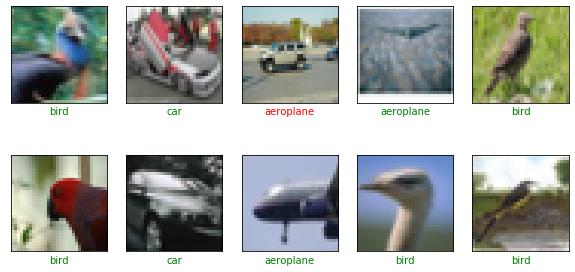

In [20]:
show_random_examples(x_test, y_test, pred)